### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

### Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('Parkinson disease.csv')

In [3]:
# printing the first 10 rows of the dataframe
parkinsons_data.head(10)
pd.options.display.max_columns = 15
parkinsons_data.head(10)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,...,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,...,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,...,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,...,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,...,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,...,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,...,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,...,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,...,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,...,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,...,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [5]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:

# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,...,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,...,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,...,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,...,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,...,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,...,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,...,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,...,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64


1  --> Parkinson's Positive

0 --> Healthy


In [9]:
# grouping the data based on the target variable
parkinsons_data.groupby('status').mean()

C:\Users\Afan Rahman\AppData\Local\Temp\ipykernel_19772\394038444.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parkinsons_data.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,...,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,...,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,...,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


status
0    [[Axes(0.125,0.755806;0.125x0.124194), Axes(0....
1    [[Axes(0.125,0.755806;0.125x0.124194), Axes(0....
dtype: object

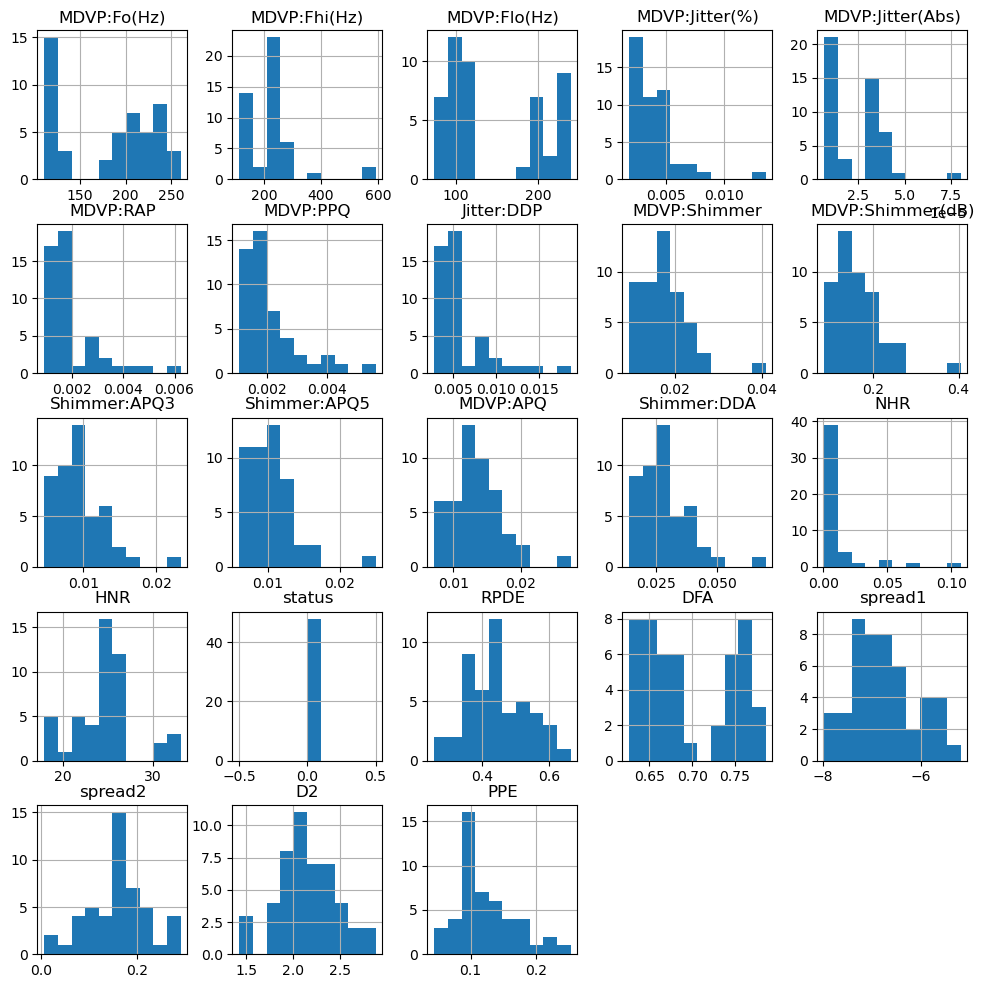

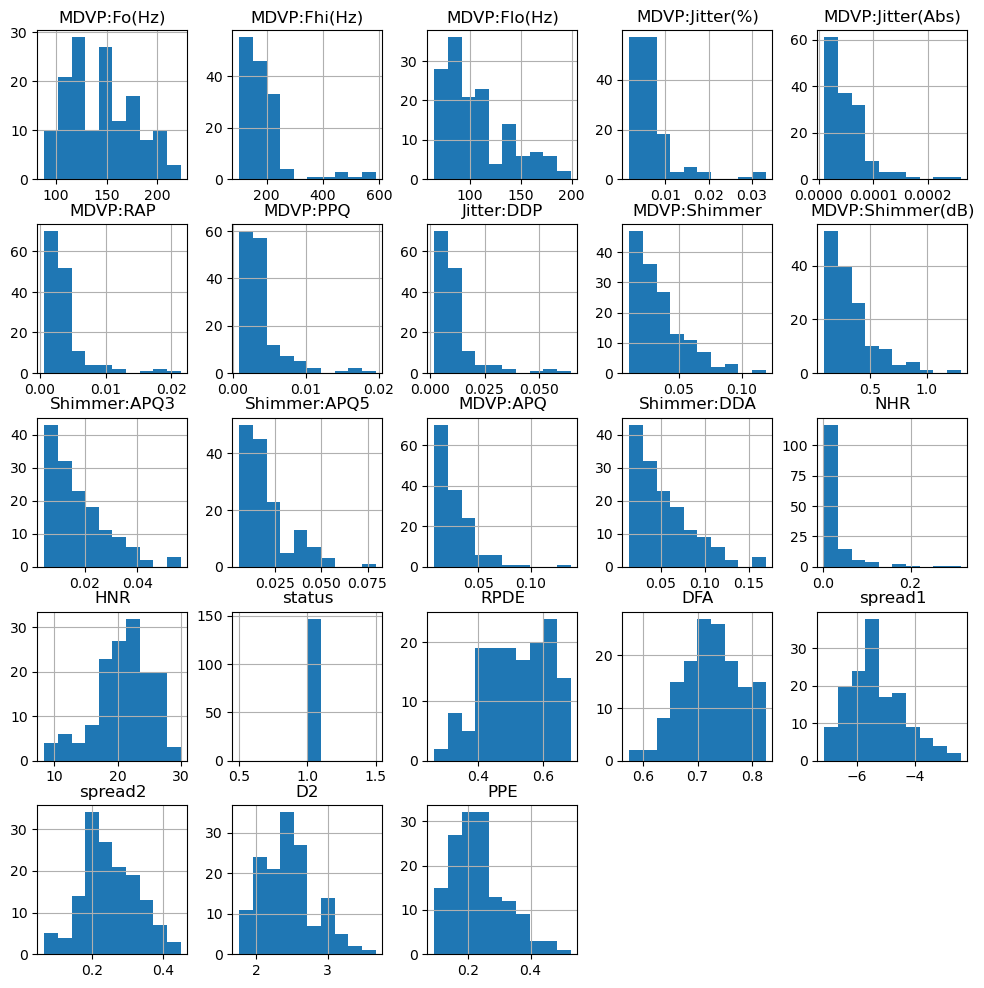

In [10]:
parkinsons_data.groupby('status').hist(figsize=(12, 12))

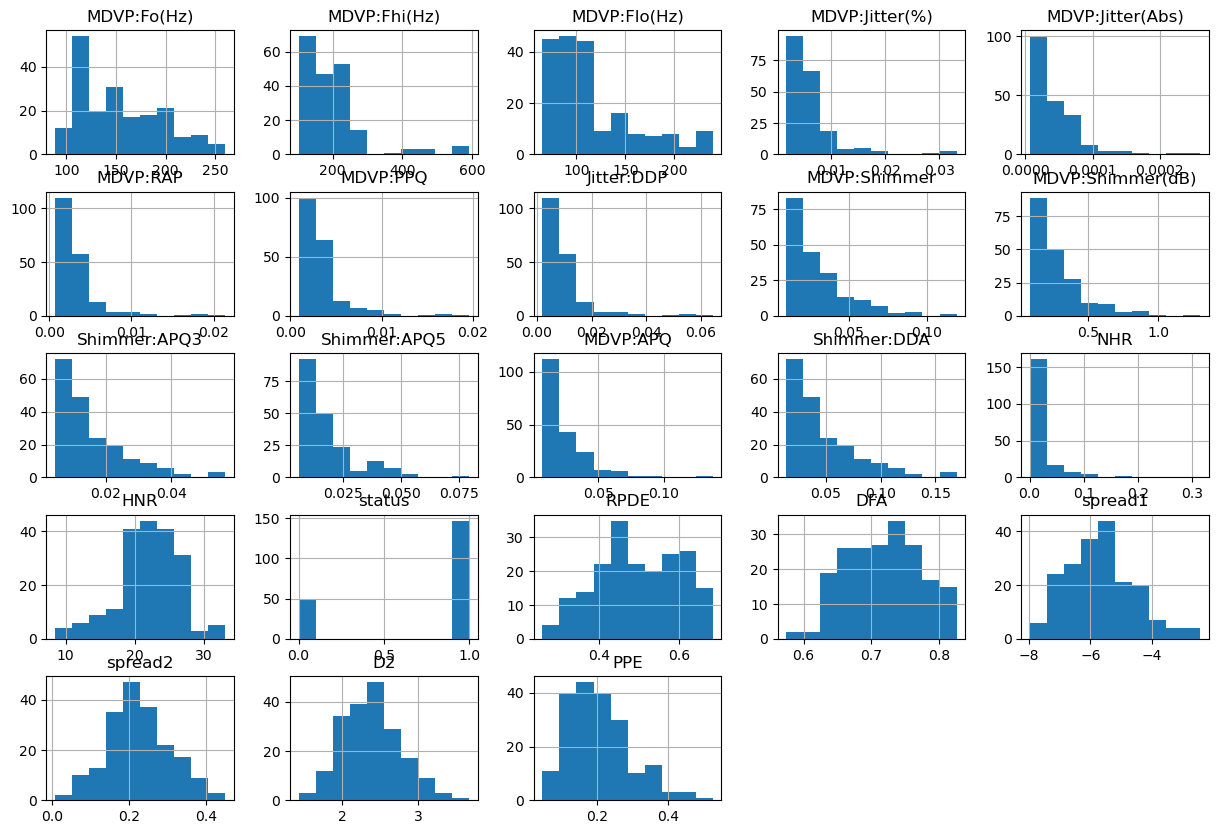

In [12]:
# Create a histogram for each feature
parkinsons_data.hist(figsize=(15, 10))

# Show the plot
plt.show()

## Data Pre-Processing

### Separating the features & Target

In [13]:
X = parkinsons_data.drop(columns=['status','name'], axis=1)
Y = parkinsons_data['status']

In [14]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  ...     HNR      RPDE       DFA  \
0             0.00007   0.00370   0.00554  ...  21.033  0.414783  0.815285   
1             0.00008   0.00465   0.00696  ...  19.085  0.458359  0.819521 

In [15]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


### Splitting the data to training data & Test data

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


### Correlation Matrix

C:\Users\Afan Rahman\AppData\Local\Temp\ipykernel_19772\1393442138.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = parkinsons_data.corr()
C:\Users\Afan Rahman\AppData\Local\Temp\ipykernel_19772\1393442138.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(parkinsons_data.corr(), annot=True, fmt='.2f', cmap="RdYlGn")


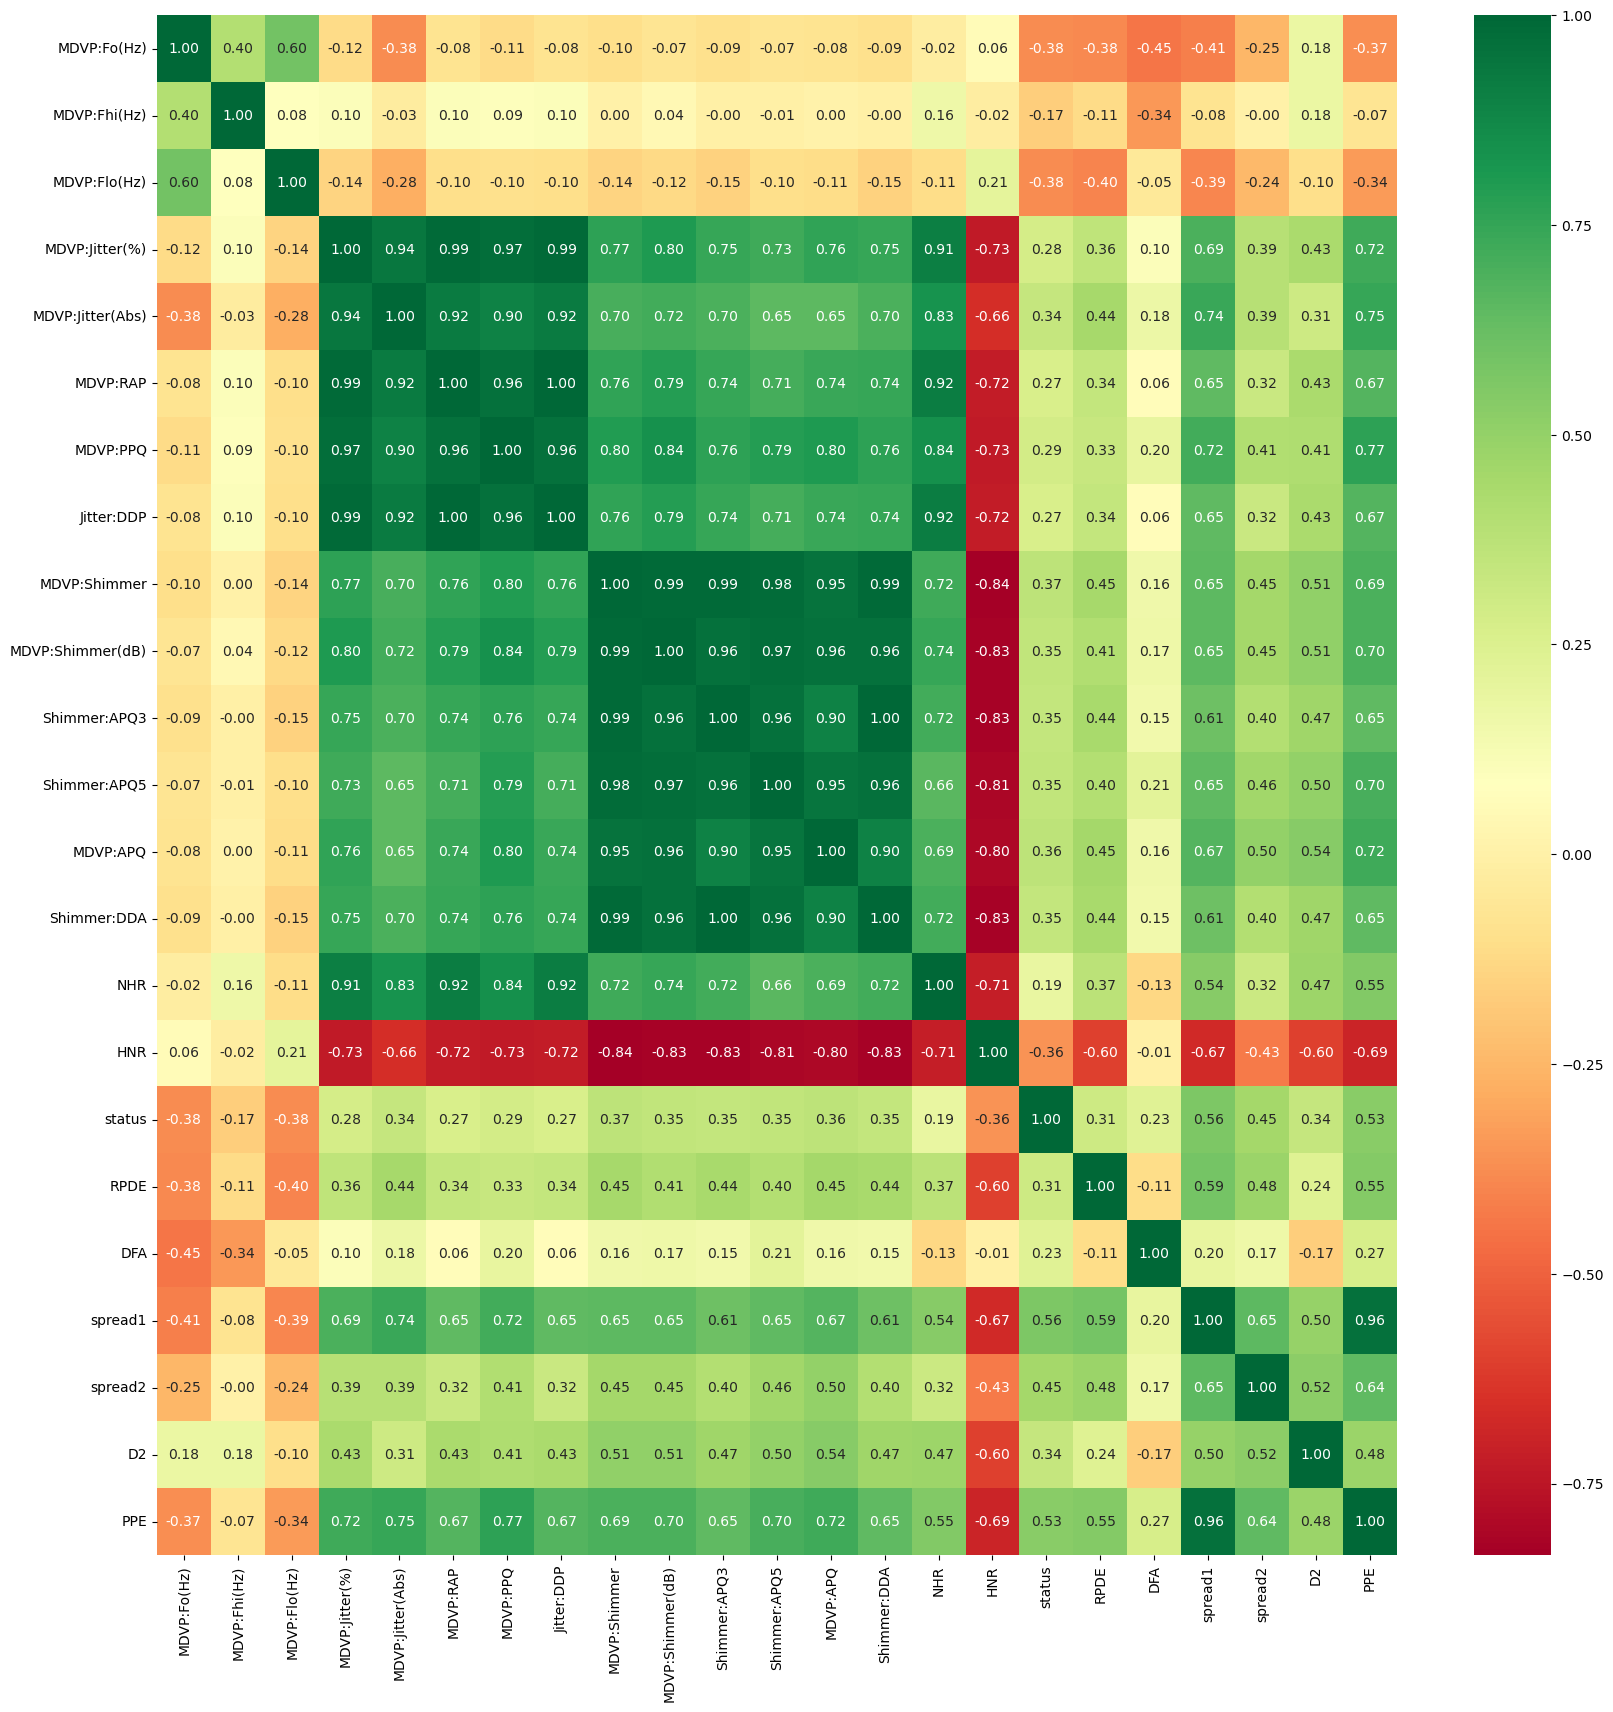

In [18]:
corr_matrix = parkinsons_data.corr()

# plotting imports
import seaborn as sns
import matplotlib.pyplot as plt
# figure size
plt.figure(figsize=(20, 20))

# correlation matrix
dataplot = sns.heatmap(parkinsons_data.corr(), annot=True, fmt='.2f', cmap="RdYlGn")

### Principal Component Analysis

In [19]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit the PCA on the data
pca.fit(X)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the percentage of variance explained by each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio*100:.2f}%")


Principal Component 1: 72.90%
Principal Component 2: 21.82%
Principal Component 3: 5.11%
Principal Component 4: 0.16%
Principal Component 5: 0.00%
Principal Component 6: 0.00%
Principal Component 7: 0.00%
Principal Component 8: 0.00%
Principal Component 9: 0.00%
Principal Component 10: 0.00%
Principal Component 11: 0.00%
Principal Component 12: 0.00%
Principal Component 13: 0.00%
Principal Component 14: 0.00%
Principal Component 15: 0.00%
Principal Component 16: 0.00%
Principal Component 17: 0.00%
Principal Component 18: 0.00%
Principal Component 19: 0.00%
Principal Component 20: 0.00%
Principal Component 21: 0.00%
Principal Component 22: 0.00%


In [20]:
import pandas as pd

# Create a DataFrame with the explained variance ratio
df = pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio})

# Add a column with the cumulative sum of the explained variance ratio
df['Cumulative Sum'] = df['Explained Variance Ratio'].cumsum()

# Display the DataFrame
print(df)


    Explained Variance Ratio  Cumulative Sum
0               7.289927e-01        0.728993
1               2.182446e-01        0.947237
2               5.112088e-02        0.998358
3               1.593751e-03        0.999952
4               3.999180e-05        0.999992
5               6.113074e-06        0.999998
6               1.022429e-06        0.999999
7               4.702660e-07        1.000000
8               2.644710e-07        1.000000
9               1.155028e-07        1.000000
10              4.478268e-08        1.000000
11              3.529647e-08        1.000000
12              5.901540e-09        1.000000
13              1.326642e-09        1.000000
14              6.436743e-10        1.000000
15              2.552126e-10        1.000000
16              4.196717e-11        1.000000
17              1.711343e-11        1.000000
18              4.871585e-12        1.000000
19              2.177322e-15        1.000000
20              5.446919e-16        1.000000
21        

In [21]:
from sklearn.decomposition import PCA

# Create a PCA object with 3 components
pca = PCA(n_components=3)

# Fit the PCA on the data
pca.fit(X)

# Transform the data using the first 3 principal components
X_pca = pca.transform(X)

# Save the transformed data to a CSV file
pd.DataFrame(X_pca).to_csv("X_pca.csv", index=False)


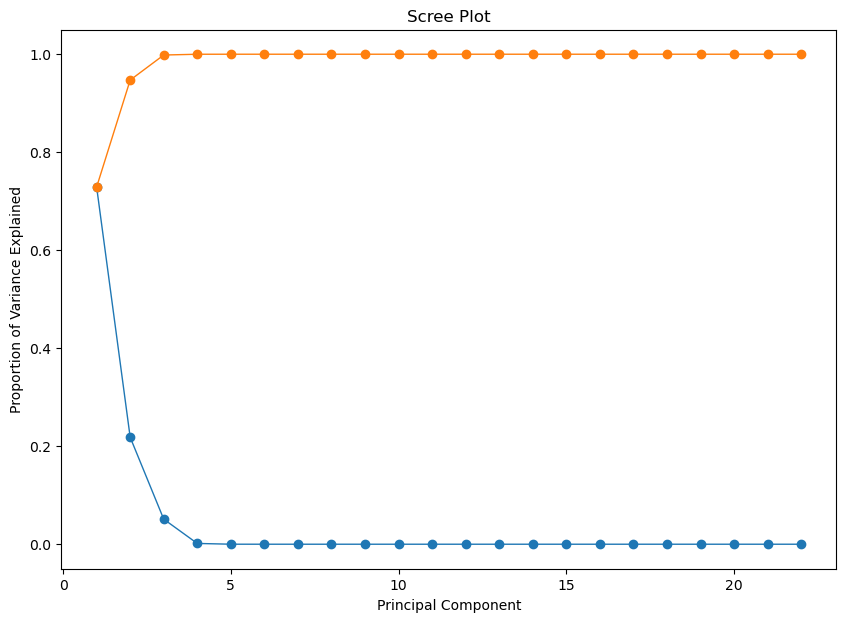

In [22]:
# Create an array of component number
components = np.arange(1, len(df) + 1)

# Create scree plot
plt.figure(figsize=(10, 7))
plt.plot(components, df, 'o-', linewidth=1)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()


### Select K-Best Technique for Feature Ranking

In [23]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Assuming that 'X' is your feature set and 'Y' is your target variable
# Convert 'X' to DataFrame if it's not already
X_df = pd.DataFrame(X)

# Select all features with mutual information
selector = SelectKBest(mutual_info_classif, k='all')
selector.fit(X_df, Y)

# Get the scores and create a DataFrame with feature names and their corresponding scores
feature_scores = pd.DataFrame({'Feature': X_df.columns, 'Score': selector.scores_})

# Sort the features based on their scores in descending order
sorted_feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print(sorted_feature_scores)


             Feature     Score
21               PPE  0.253982
18           spread1  0.221368
0        MDVP:Fo(Hz)  0.206593
19           spread2  0.192002
12          MDVP:APQ  0.182945
2       MDVP:Flo(Hz)  0.174088
4   MDVP:Jitter(Abs)  0.169742
1       MDVP:Fhi(Hz)  0.140713
15               HNR  0.132462
14               NHR  0.116412
11      Shimmer:APQ5  0.112837
3     MDVP:Jitter(%)  0.110892
13       Shimmer:DDA  0.110436
10      Shimmer:APQ3  0.108775
9   MDVP:Shimmer(dB)  0.107878
8       MDVP:Shimmer  0.101997
6           MDVP:PPQ  0.098392
5           MDVP:RAP  0.097698
7         Jitter:DDP  0.095316
17               DFA  0.095116
16              RPDE  0.037003
20                D2  0.017913


In [24]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Assuming that 'X' is your feature set and 'Y' is your target variable
# Convert 'X' to DataFrame if it's not already
X_df = pd.DataFrame(X)

# Select all features with mutual information
selector = SelectKBest(mutual_info_classif, k='all')
selector.fit(X_df, Y)

# Get the scores and create a DataFrame with feature names and their corresponding scores
feature_scores = pd.DataFrame({'Feature': X_df.columns, 'Score': selector.scores_})

# Calculate the 75th percentile of the scores
threshold = feature_scores['Score'].quantile(0.75)

# Keep only the features with scores above the threshold
important_features = feature_scores[feature_scores['Score'] > threshold]

print(important_features)


             Feature     Score
0        MDVP:Fo(Hz)  0.206593
4   MDVP:Jitter(Abs)  0.210143
12          MDVP:APQ  0.183690
18           spread1  0.221368
19           spread2  0.192002
21               PPE  0.253982


### Scaling

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X_train)

StandardScaler()

In [39]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [28]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


### Model Training

### Support Vector Machine Algorithm - PCA Dataset

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Apply StandardScaler and MinMaxScaler
scaler = StandardScaler()
X_pca = scaler.fit_transform(X_pca)
scaler = MinMaxScaler()
X_pca = scaler.fit_transform(X_pca)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

# Train an SVM model by varying its parameters
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC(probability=True)
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]

# Calculate the prediction scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the prediction scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


Accuracy: 0.90
Precision: 0.90
Recall: 0.97
F1 Score: 0.93
ROC AUC: 0.94


### Support Vector Machine Algorithm - OriginalDataset

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Apply StandardScaler and MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Train an SVM model by varying its parameters
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC(probability=True)
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]

# Calculate the prediction scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the prediction scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


Accuracy: 0.87
Precision: 0.90
Recall: 0.93
F1 Score: 0.92
ROC AUC: 0.96


In [31]:
# Print the best parameters
print(f'Best Parameters: {clf.best_params_}')
#svm pca

Best Parameters: {'C': 10, 'kernel': 'rbf'}


In [32]:
# Print the best parameters
print(f'Best Parameters: {clf.best_params_}')

Best Parameters: {'C': 10, 'kernel': 'rbf'}


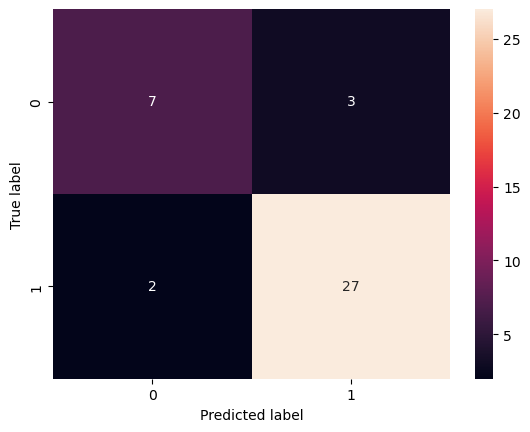

In [34]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the last fold
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


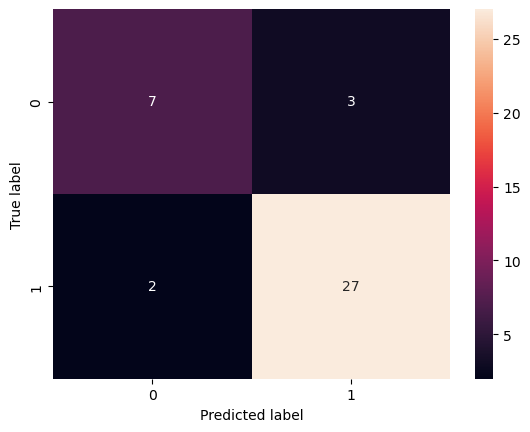

In [35]:

# Calculate the confusion matrix for the last fold
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### K-Nearest Neighbor Algorithm

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

# Train a KNN model by varying its parameters
parameters = {'n_neighbors':[1,3, 5, 7]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]

# Calculate the prediction scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the prediction scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


Accuracy: 0.90
Precision: 0.90
Recall: 0.97
F1 Score: 0.93
ROC AUC: 0.87


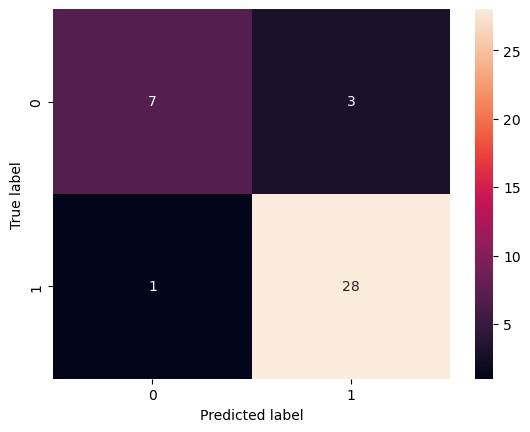

In [37]:

# Calculate the confusion matrix for the last fold
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Multiple Perceptron Algorithm - PCA Dataset

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Apply StandardScaler and MinMaxScaler
scaler = StandardScaler()
X_pca = scaler.fit_transform(X_pca)
scaler = MinMaxScaler()
X_pca = scaler.fit_transform(X_pca)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

# Train an MLP model by varying its parameters
parameters = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['logistic', 'tanh', 'relu']}
mlp = MLPClassifier(max_iter=10000)
clf = GridSearchCV(mlp, parameters)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]

# Calculate the prediction scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the prediction scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


Accuracy: 0.87
Precision: 0.85
Recall: 1.00
F1 Score: 0.92
ROC AUC: 0.78


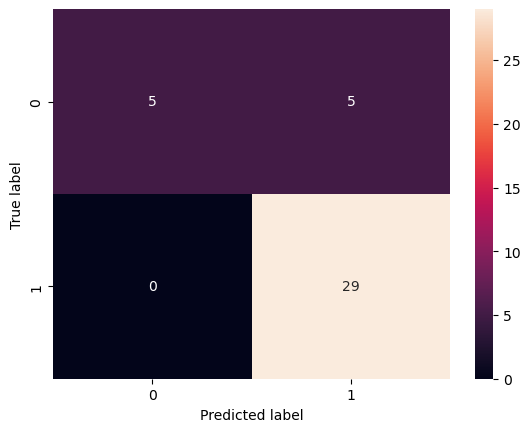

In [53]:

# Calculate the confusion matrix for the last fold
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Multiple Perceptron Algorithm - Original Dataset

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Apply StandardScaler and MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

# Train an MLP model by varying its parameters
parameters = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['logistic', 'tanh', 'relu']}
mlp = MLPClassifier(max_iter=10000)
clf = GridSearchCV(mlp, parameters)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]

# Calculate the prediction scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the prediction scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


Accuracy: 0.87
Precision: 0.85
Recall: 1.00
F1 Score: 0.92
ROC AUC: 0.78


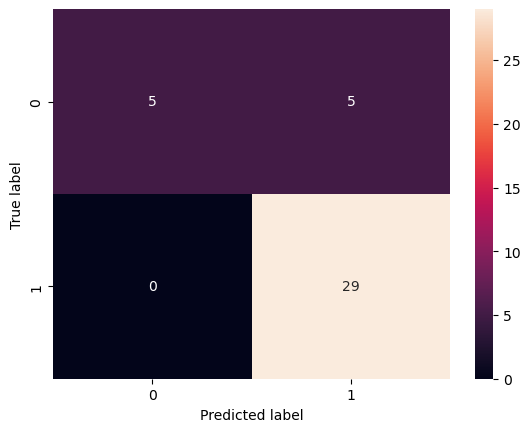

In [55]:

# Calculate the confusion matrix for the last fold
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [56]:
# Print the best parameters
print(f'Best Parameters: {clf.best_params_}')

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50,)}


### Deep Neural Network Algorithm - PCA Dataset

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Apply StandardScaler and MinMaxScaler
scaler = StandardScaler()
X_pca = scaler.fit_transform(X_pca)
scaler = MinMaxScaler()
X_pca = scaler.fit_transform(X_pca)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

# Create a deep neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10)

# Make predictions on the testing set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)


# Calculate the prediction scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the prediction scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.6346
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.7564
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.7564
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6071 - accuracy: 0.7564
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5911 - accuracy: 0.7564
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5807 - accuracy: 0.7564
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7564
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5644 - accuracy: 0.7564
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7564
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5573 - accuracy: 0.7564
Epoch 11/

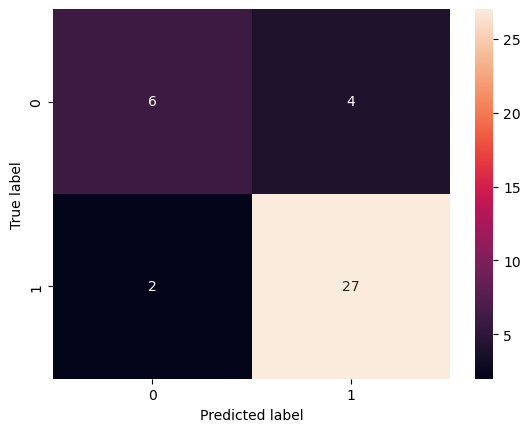

In [58]:

# Calculate the confusion matrix for the last fold
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Deep Neural Network Algorithm - Original Dataset

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Apply StandardScaler and MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create a deep neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10)

# Make predictions on the testing set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)


# Calculate the prediction scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the prediction scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6301 - accuracy: 0.7372
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5666 - accuracy: 0.7628
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.7564
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7564
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4766 - accuracy: 0.7564
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7564
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4510 - accuracy: 0.7628
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.7821
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.7949
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8269
Epoch 11/

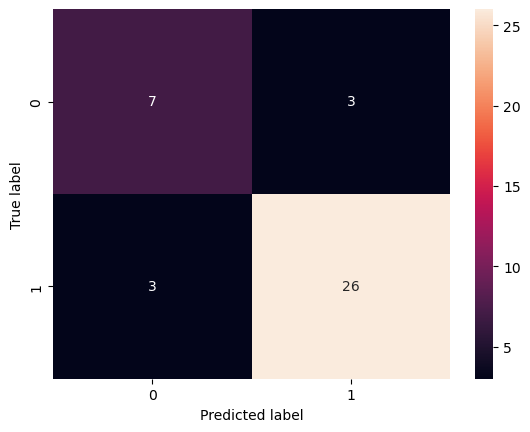

In [60]:

# Calculate the confusion matrix for the last fold
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### XG-Boost Algorithm - PCA Dataset

In [61]:
from xgboost import XGBClassifier
from sklearn.preprocessi### XG-Boost Algorithm - Original Datasetng import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Apply StandardScaler and MinMaxScaler
scaler = StandardScaler()
X_pca = scaler.fit_transform(X_pca)
scaler = MinMaxScaler()
X_pca = scaler.fit_transform(X_pca)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

# Train a boosted decision tree model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:,1]

# Calculate the prediction scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the prediction scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
import time

start_time = time.time()

# Your code here

end_time = time.time()

elapsed_time = end_time - start_time
print(f'Time taken to run the code: {elapsed_time:.2f} seconds')



Accuracy: 0.79
Precision: 0.86
Recall: 0.86
F1 Score: 0.86
ROC AUC: 0.90
Time taken to run the code: 0.00 seconds


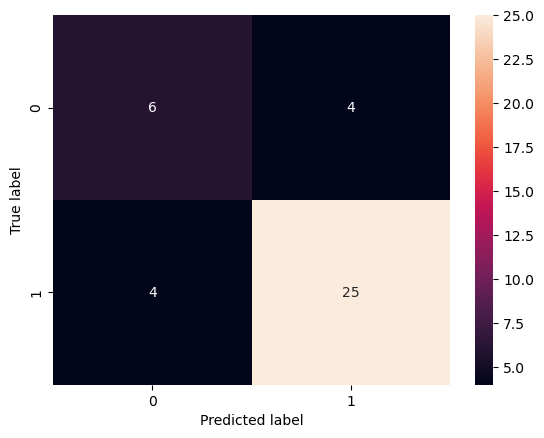

In [62]:

# Calculate the confusion matrix for the last fold
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### XG-Boost Algorithm - Original Dataset

In [63]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Apply StandardScaler and MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Train a boosted decision tree model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:,1]

# Calculate the prediction scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the prediction scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')




Accuracy: 0.95
Precision: 1.00
Recall: 0.93
F1 Score: 0.96
ROC AUC: 0.99


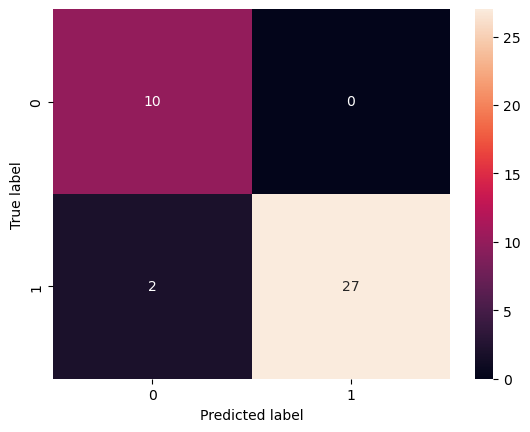

In [64]:

# Calculate the confusion matrix for the last fold
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Random Forest Algorithm - PCADataset

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

start_time = time.time()

# Apply StandardScaler and MinMaxScaler
scaler = StandardScaler()
X_pca = scaler.fit_transform(X_pca)
scaler = MinMaxScaler()
X_pca = scaler.fit_transform(X_pca)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

# Train a Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)[:,1]

# Calculate the prediction scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the prediction scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
import time

start_time = time.time()

# Your code here

end_time = time.time()

elapsed_time = end_time - start_time
print(f'Time taken to run the code: {elapsed_time:.2f} seconds')



Accuracy: 0.87
Precision: 0.88
Recall: 0.97
F1 Score: 0.92
ROC AUC: 0.89
Time taken to run the code: 0.00 seconds


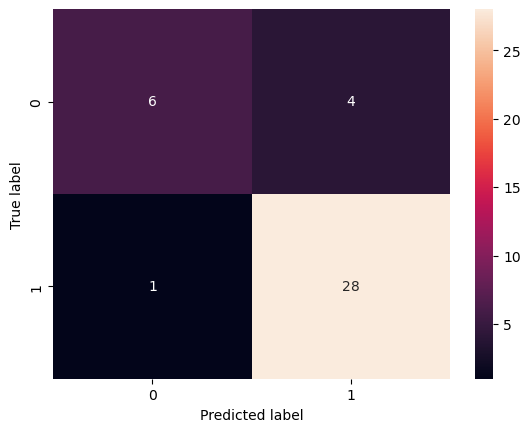

In [66]:

# Calculate the confusion matrix for the last fold
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Random Forest Algorithm - Original Dataset

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Apply StandardScaler and MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Train a Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)[:,1]

# Calculate the prediction scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the prediction scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')




Accuracy: 0.92
Precision: 0.93
Recall: 0.97
F1 Score: 0.95
ROC AUC: 0.98


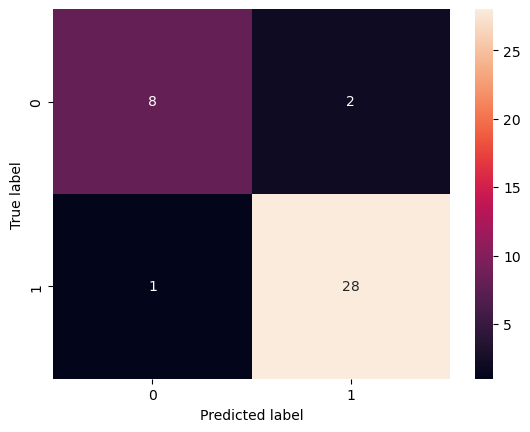

In [68]:

# Calculate the confusion matrix for the last fold
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()